# Group EDA
Group 1

Members: Kim Buesser, Katie O'Connor, Kyle Anderson, Griffin Brown

## Contribution

- Grif
  - Stand up GCP bucket for data source to enable cross-team collaboration
  - Analyze distributions of orders over time to uncover plant adoption of the software
  - Interpret hourly jobs to identify patterns and insights.
  - Visualize the number of jobs by plant to understand distribution across locations
  - Develop an equipment lifetime model for predicting future performance and compare it against actual maintenance dates
  - Synthesize all group members' EDA into initial single cohesive notebook for submission

- Kyle
    - Investigate events by Location to identify different occurrence and maintenance practices
    - Startups occurrences can tell us when large amounts of input have entered the system
    - Daily maintenance events for daily part breakage and up-keep maintenance
    - Loops for type conversion for automation
    - Statistical findings discussion and analysis of each columns top/common data

- Katie
  - Intro/writeups on missing data/description of data available, and compiling questions to guide exploration
  - Some initial data exploration including: distribution of nulls, and unique values for categorical columns
  - Graphing maintenance by production locations
  - Analysis of planned vs unplanned maintenance, maintenance activities as well as production locations

- Kim
  - All breakout equipment breakdown time series models (for loop)
  - All breakout replacement time series graphs (for loop)
  - String cleaning to accurately investigate breakouts
  - Top Breakdowns/Replacements by Plant
  - Final Thoughts section
  - Added descriptive labels to graphs


<a class="anchor" id="back_to_toc"></a>

## Table of Contents

* [Introduction](#introduction)
  * [Problem Statement](#problem_statement)
  * [Description of the Data Available](#description)
* [Discussion of Missing Data](#missing)
* [Questions to Guide Exploration](#questions)
* [Package Import](#package_import)
* [Data Loading](#data_loading)
* [Basic Stats](#basic_stats)
* [Time](#time)
* [Production Location](#production_location)
* [Start Ups](#start_ups)
* [Breakdowns](#breakdowns)
* [Equipment Description](#equipment_description)
* [Real Life Cycle](#real_life_cycle)
  * [Aggregate](#aggregate)
  * [Find Last Execution](#find_last_execution)
  * [Find Lifespan](#find_lifespan)
* [Final Thoughts](#final_thoughts)

<a class="anchor" id="introduction"></a>

## Introduction

Swire Coca-Cola is a major bottling partner of The Coca-Cola Company in the Western United States, operating 6 production plants across 13 states. These plants support the distribution, marketing, and production of Coca-Cola products.

<a class="anchor" id="problem_statement"></a>

###Problem Statement

As the primary bottler in this region, Swire Coca-Cola's operational efficiency directly affects the entire distribution network. Despite achieving a mechanical efficiency of 94%, the company faces significant downtime due to unforeseen machine breakdowns and inadequate predictive maintenance. These inefficiencies result in an estimated annual loss of $60 million in uncaptured revenue. The current maintenance process, which involves issuing work orders, waiting for parts, and making repairs, lacks proactive planning to prevent extended production stoppages, ultimately impacting overall plant performance.

This project aims to explore the factory line maintenance data to identify patterns in machine downtimes and evaluate the effectiveness of maintenance activities. By conducting Exploratory Data Analysis (EDA), we hope to uncover key insights into what drives downtime and provide recommendations for improving operational efficiency.

As we perform EDA on this dataset, we will be exploring relationships with the target variable, MAINTENANCE_PLAN, which is essentially the column that tells us if the maintenance was planned or not.

<a class="anchor" id="description"></a>

### Description of the data available

The dataset provides a breakdown of maintenance activities across Swire Coca-Cola’s production locations. It includes key details like equipment IDs, maintenance start and finish dates, work duration, and whether the maintenance was planned or unplanned. This gives us the groundwork to explore maintenance patterns, downtime, and identify opportunities for improving efficiency.

<a class="anchor" id="missing"></a>

### Discussion of missing data
A large portion of the data contains null values—currently, only 9 out of the 25 columns are fully complete. Most of the missing values are in fields related to planned maintenance, which largely represent unplanned activities that weren’t part of a predefined schedule. We're also missing about 80% of the equipment IDs, making it tough to drill down into equipment-specific insights. It is also worth noting that columns specifying production locations and maintenance start and end times are fully complete, providing a reliable foundation for time-based and location-specific analyses.

<a class="anchor" id="questions"></a>

### Questions to guide exploration:

- How many null values are present in the data set?
- What does the summary of each column look like?
- How many unique values are present in each column?
- What is the current distribution of planned vs. unplanned maintenance?
- How do maintenance times vary by equipment type?
- What types of maintenance activities are most common?
- Are there any plants that are more likely to perform planned maintenance?
- What does the overall maintenance activity look like across plants (both planned and unplanned)?
- Is there a difference in the amount of time it takes to perform maintenence planned vs unplanned?
- How do maintenance times vary by equipment type?
- Is there a relationship between equipment description and the frequency of planned and unplanned maintenance?
- What does maintenance activity look like over time?
- What does the distribution of maintenance time look like by plant?
- How many maintenance activities were started per month and year?
- Are there any machines or parts that are more likely to recieve unplanned maintenence/what are the top breakdowns that have occured over time?
- Are there specific production lines or areas that experience more frequent unplanned maintenance?
- Are more frequently maintained machines less likely to require unplanned maintenance?
- How many times was a product maintained and how much time did it take?
- What does the lifespan of each piece of equipment look like by production plant?


 <a class="anchor" id="package_import"></a>

## Package Import

In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from google.cloud import storage
import os
from io import StringIO
import json
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

<a class="anchor" id="data_loading"></a>

## Data Loading

[Back to Table of Contents](#back_to_toc)

In [ ]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "swire-capstone-2024-0b05c28274b1.json"

STORAGE_BUCKET = 'swire-provided-data'

storage_client = storage.Client()
bucket = storage_client.bucket(STORAGE_BUCKET)

file_path_in_bucket = 'IWC_Work_Orders_Extract.csv'

blob = bucket.blob(file_path_in_bucket)

csv_data = blob.download_as_string()

df = pd.read_csv(StringIO(csv_data.decode('utf-8')), low_memory=False)
print("File loaded from Google Cloud Storage.")

File loaded from Google Cloud Storage.


In [ ]:
# view first few rows
df.head()

,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,MAINTENANCE_ITEM,MAINTENANCE_ACTIVITY_TYPE,ORDER_DESCRIPTION,MAINTENANCE_TYPE_DESCRIPTION,FUNCTIONAL_LOC,FUNCTIONAL_AREA_NODE_1_MODIFIED,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO
0,705642457,G812,ROMA,2024-05-04,2024-05-12,06:00:00.000,23:04:08.000,390.0,NaN,NaN,Unplanned,L2 GEARBOX LEAK (SEE ATTACHED),Corrective Maintenance Order,G812-PRD-L15-L03-L030-020,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
1,704191697,G812,ROMA,2022-09-13,2022-09-13,06:00:00.000,17:17:24.000,420.0,NaN,NaN,Unplanned,LINE 3 CONVEYOR AT CAN CODER,Corrective Maintenance Order,G812-PRD-L15-L03-L030-020,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
2,704466547,G812,ROMA,2022-12-21,2022-12-21,07:00:00.000,07:00:00.000,30.0,NaN,NaN,Unplanned,BROKEN CONVEYOR RAIL,Corrective Maintenance Order,G812-PRD-L15-L03-L030-020,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
3,703834477,G812,ROMA,2022-07-04,2022-07-04,06:00:00.000,06:00:00.000,60.0,NaN,NaN,Unplanned,LINE 3 CONVEYOR,Corrective Maintenance Order,G812-PRD-L15-L03-L030-020,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
4,704661125,G291,MONZA,2023-03-15,2023-03-15,07:00:00.000,07:00:00.000,120.0,NaN,NaN,Unplanned,REPLACED SONIC AIR BLOWER BELT,Corrective Maintenance Order,G291-PRD-P05,MONZA PRODUCTION,AIR SYSTEMS,NaN,NaN,NaN,300001088.0,TANK_STL_STOR_AIR,Machines,2017-02-15,2023-12-11,9999-12-31


<a class="anchor" id="basic_stats"></a>

## Basic Stats

[Back to Table of Contents](#back_to_toc)

In [ ]:
# viewing preliminary info on the dateset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427264 entries, 0 to 1427263
Data columns (total 25 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   ORDER_ID                         1427264 non-null  int64  
 1   PLANT_ID                         1427264 non-null  object 
 2   PRODUCTION_LOCATION              1427264 non-null  object 
 3   EXECUTION_START_DATE             1427264 non-null  object 
 4   EXECUTION_FINISH_DATE            1427264 non-null  object 
 5   ACTUAL_START_TIME                1427264 non-null  object 
 6   ACTUAL_FINISH_TIME               1427264 non-null  object 
 7   ACTUAL_WORK_IN_MINUTES           1427264 non-null  float64
 8   MAINTENANCE_PLAN                 152594 non-null   object 
 9   MAINTENANCE_ITEM                 152594 non-null   float64
 10  MAINTENANCE_ACTIVITY_TYPE        1427264 non-null  object 
 11  ORDER_DESCRIPTION                291767 non-null  

One thing that immediately sticks out is the amount of nulls in the dataset. Further analyzing the dataset will give us a better idea of potential next steps for how best to handle/work with those nulls.

In [ ]:
# ensuring consistent date/time format
df['START_YEAR_MONTH'] = pd.to_datetime(df['EXECUTION_START_DATE']).dt.strftime('%Y-%m')

# creating new year and equiment start up year/month columns
df['YEAR'] = pd.to_datetime(df['EXECUTION_START_DATE']).dt.year
df['EQUIP_START_UP_YEAR_MONTH'] = pd.to_datetime(df['EQUIP_START_UP_DATE']).dt.strftime('%Y-%m')
df['ACTUAL_START_TIME'] = pd.to_datetime('1900-01-01 ' + df['ACTUAL_START_TIME'], errors='coerce')
df['ACTUAL_FINISH_TIME'] = pd.to_datetime('1900-01-01 ' + df['ACTUAL_FINISH_TIME'], errors='coerce')

In [ ]:
# extracting the year-month from 'EXECUTION_START_DATE'
date_columns = [col for col in df.columns if 'date' in col.lower()]
df[date_columns] = df[date_columns].apply(pd.to_datetime, errors='coerce')
df['MONTH'] = df['EXECUTION_START_DATE'].dt.to_period('M').dt.to_timestamp()

In [ ]:
# converting date columns to datetime, and printng a summary based on whether the column is date, numeric, or categorical
for col in df.columns:
    print(f"Feature: {col}")

    if 'date' in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(df[col].describe())  # Describe datetime features

    elif pd.api.types.is_numeric_dtype(df[col]):
        print(df[col].describe())

    elif pd.api.types.is_object_dtype(df[col]) or pd.api.types.is_categorical_dtype(df[col]):
        print(df[col].describe())

    else:
        print(f"{col} has an unsupported data type for description.")

    print("\n" + "="*40 + "\n")

Feature: ORDER_ID
count    1.427264e+06
mean     4.561470e+10
std      8.387114e+10
min      1.000219e+08
25%      4.022602e+08
50%      7.044271e+08
75%      1.002343e+09
max      9.000001e+11
Name: ORDER_ID, dtype: float64


Feature: PLANT_ID
count     1427264
unique          6
top          G261
freq       630903
Name: PLANT_ID, dtype: object


Feature: PRODUCTION_LOCATION
count         1427264
unique              6
top       SILVERSTONE
freq           630903
Name: PRODUCTION_LOCATION, dtype: object


Feature: EXECUTION_START_DATE
count                          1427264
mean     2020-12-20 22:30:26.756647424
min                2013-08-19 00:00:00
25%                2019-02-09 00:00:00
50%                2020-12-09 00:00:00
75%                2022-12-07 00:00:00
max                2024-08-30 00:00:00
Name: EXECUTION_START_DATE, dtype: object


Feature: EXECUTION_FINISH_DATE
count                          1427264
mean     2020-12-21 15:53:00.772163072
min                2016-07-25 00:00

- Order ID - is the most unique and uninteresting
- Plant ID - 6 locations, Top is G261
- Production Location - 6 locations, Silverstone at the top
- Execution Start Date - Mean is 2020-12-20, it would be good to run a graph or median to see weights and maybe reduce for data cleaning
- Execution Finish Date - Mean is 2020-12-21, more stats needed
- Actual Start Time - Most frequent is 12 am...
- Actual Finish Time - Most frequent is 12 am...
- Actual Work In Minutes - tbd
- Maintenance Plan - tbd
- Maintenance Item - tbd
- Maintenance Activity Type - Unplanned most common, TARGET variable
- Order Description - Dtrine most common
- Maintenance Type Description - Preventive Maintenance Order most common
- Functional Loc - G812-PRD most common with 667 unique locations
- Functional Area Node 1 Modified - COTA Production most common, 7 unique and this is where I identified, whoever created this is a motorcycle racing fan
- Functional Area Node 2 Modified - CAN Line most common with 67 unique
- Functional Area Node 3 Modified - Line #4- Filler Rotary CAN most common, 141 unique
- Functional Area Node 4 Modified - Filler most common, 86 unique
- Functional Area Node 5 Modified - Full CAN to Accumulation Table most common, 36 unique
- Equipment Desc - L1 Filler Rotary CAN 72 Valve, 807 unique
- Equip Cat Desc - 4 unique, top Machines
- Equip Start Up Date - 2017-06-19 mean, more detail needed
- Equip Valid From - 137 unique, top is 2017-02-15
- Equip Valid To - 1 unique, assumption is all pieces last to the end of time?

What is the distribution of nulls in the data set?

In [ ]:
# calculating proportion of nulls
df.isnull().sum() / len(df)

,0
ORDER_ID,0.000000
PLANT_ID,0.000000
PRODUCTION_LOCATION,0.000000
EXECUTION_START_DATE,0.000000
EXECUTION_FINISH_DATE,0.000000
ACTUAL_START_TIME,0.000000
ACTUAL_FINISH_TIME,0.000000
ACTUAL_WORK_IN_MINUTES,0.000000
MAINTENANCE_PLAN,0.893086
MAINTENANCE_ITEM,0.893086


So, 89% of the maintenance_plan column is null. That means that these are unplanned maintenance tasks. About 80% of the equipment_id column is also null - so we don't have specific part descriptions for most of the parts repalced.

To explore the columns a little bit more, let's take a look at the number of unique values in each.

In [ ]:
# Calculate the number of unique values for categorical columns
categorical_columns = [
    'PLANT_ID', 'PRODUCTION_LOCATION', 'MAINTENANCE_PLAN', 'MAINTENANCE_ITEM',
    'EQUIP_CAT_DESC', 'MAINTENANCE_ACTIVITY_TYPE', 'ORDER_DESCRIPTION',
    'MAINTENANCE_TYPE_DESCRIPTION', 'FUNCTIONAL_LOC',
    'FUNCTIONAL_AREA_NODE_1_MODIFIED', 'FUNCTIONAL_AREA_NODE_2_MODIFIED',
    'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'FUNCTIONAL_AREA_NODE_4_MODIFIED',
    'FUNCTIONAL_AREA_NODE_5_MODIFIED', 'EQUIPMENT_DESC'
]

# Calculate the number of unique values for categorical columns
for col in categorical_columns:
    print(f"\nNumber of unique values in {col}: {df[col].nunique()}")


Number of unique values in PLANT_ID: 6

Number of unique values in PRODUCTION_LOCATION: 6

Number of unique values in MAINTENANCE_PLAN: 3308

Number of unique values in MAINTENANCE_ITEM: 4021

Number of unique values in EQUIP_CAT_DESC: 4

Number of unique values in MAINTENANCE_ACTIVITY_TYPE: 2

Number of unique values in ORDER_DESCRIPTION: 118925

Number of unique values in MAINTENANCE_TYPE_DESCRIPTION: 5

Number of unique values in FUNCTIONAL_LOC: 667

Number of unique values in FUNCTIONAL_AREA_NODE_1_MODIFIED: 7

Number of unique values in FUNCTIONAL_AREA_NODE_2_MODIFIED: 67

Number of unique values in FUNCTIONAL_AREA_NODE_3_MODIFIED: 141

Number of unique values in FUNCTIONAL_AREA_NODE_4_MODIFIED: 86

Number of unique values in FUNCTIONAL_AREA_NODE_5_MODIFIED: 36

Number of unique values in EQUIPMENT_DESC: 807


The above shows us that there are 6 plants, 6 production locations (which aligns with the number of plants), etc.  This provides us with a good overview of what we will be working with categorical value wise.

What is the current distribution of planned vs. unplanned maintenance?

In [ ]:
# Planned vs. Unplanned Maintenance (Check the ratio of planned to unplanned)
df['Planned'] = df['MAINTENANCE_PLAN'].notnull()
planned_vs_unplanned = df['Planned'].value_counts(normalize=True)
print("\nPlanned vs. Unplanned Maintenance:")
print(planned_vs_unplanned)


Planned vs. Unplanned Maintenance:
Planned
False    0.893086
True     0.106914
Name: proportion, dtype: float64


About 89% of our data is unplanned maintenance. This is good information to have, given Swire's main concern is the unplanned maintenance.  We now know what that ratio looks like in this dataset.

Is there a difference in the amount of time it takes to perform maintenence planned vs unplanned?

In [ ]:
# Calculate the average time taken for planned vs unplanned maintenance
df.groupby(df['MAINTENANCE_PLAN'].notnull())['ACTUAL_WORK_IN_MINUTES'].mean()

,ACTUAL_WORK_IN_MINUTES
MAINTENANCE_PLAN,
False,93.129113
True,51.044412


Planned maintenence takes significantly less time than unplanned maintenence (Unplanned maintenance is on average 42 minutes longer).

How do maintenance times vary by equipment type (EQUIP_CAT_DESC)?

In [ ]:
# Group by equipment category and calculate the average maintenance time
df.groupby('EQUIP_CAT_DESC')['ACTUAL_WORK_IN_MINUTES'].mean().sort_values(ascending=False)

,ACTUAL_WORK_IN_MINUTES
EQUIP_CAT_DESC,
Production resources/tools,259.317073
Test/measurement equipment,78.468750
Plant & Buildings,78.412987
Machines,72.547352


Production resources/tools take over three times as long on average to perform maintenance tasks on. This is something that we can look further into.

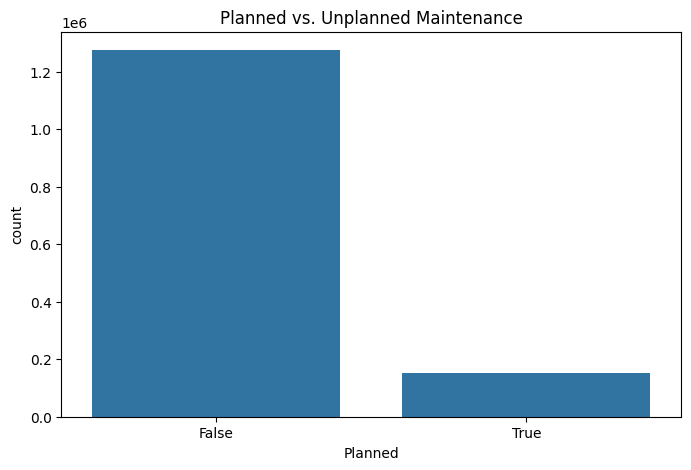

In [ ]:
# Plot planned vs unplanned maintenance
plt.figure(figsize=(8, 5))
sns.countplot(x='Planned', data=df)
plt.title('Planned vs. Unplanned Maintenance')
plt.show()

What is the proportion of planned to unplanned maintenance at each plant?

In [ ]:
# Calculate the proportion of planned maintenance for each plant
df.groupby('PRODUCTION_LOCATION')['MAINTENANCE_PLAN'].apply(lambda x: x.notnull().mean()).sort_values(ascending=False)

,MAINTENANCE_PLAN
PRODUCTION_LOCATION,
ROMA,0.268677
COTA,0.226495
MONZA,0.225392
MONACO,0.096229
SUZUKA,0.062593
SILVERSTONE,0.044156


The ROMA, COTA, and MOZDA locations have the highest proportion of unplanned maintenance.

What types of maintenance activities are most common?

In [ ]:
# Count the frequency of each type of maintenance activity
df['MAINTENANCE_TYPE_DESCRIPTION'].value_counts()

,count
MAINTENANCE_TYPE_DESCRIPTION,
Preventive Maintenance Order,151533
Corrective Maintenance Order,134074
Administrative Order,6161
Capital Order,22
Breakdown Maintenance Order,5


From what we can see above, preventive maintenance is the most frequent type of maintenance activity found. But, about 80% of the data in that column is null - so we'll want to be careful about drawing conclusions from this. Most likely these values are aligned more with the planned maintenance activities.

<a class="anchor" id="time"></a>

## Time

[Back to Table of Contents](#back_to_toc)

<Figure size 1000x600 with 0 Axes>

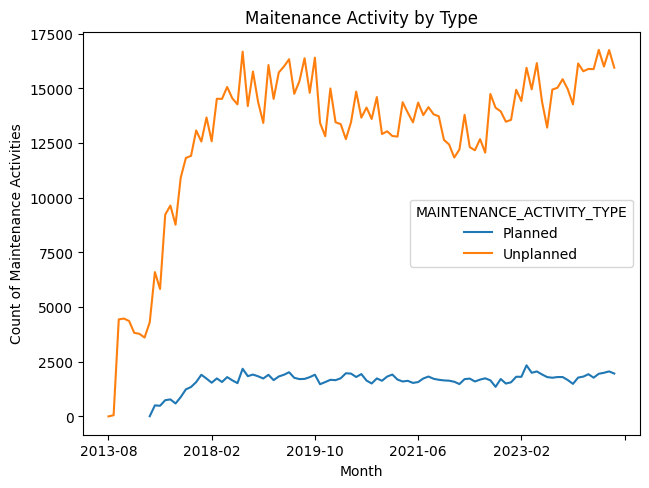

In [ ]:
# visualizing maintenance acivity over time
count_by_year = df.groupby(['START_YEAR_MONTH', 'MAINTENANCE_ACTIVITY_TYPE']).size().unstack()

plt.figure(figsize=(10, 6))
count_by_year.plot(kind='line')
plt.tight_layout()
plt.title("Maitenance Activity by Type")
plt.xlabel("Month")
plt.ylabel("Count of Maintenance Activities")
plt.show()

Something tells us that only data after the 2017 mark seems to be at a level that is worth looking at. Perhaps the company didn't roll this system out to other plants until after 2016. It's also worth noting that "planned" maintenance orders didn't start until about 2017 and from 2018 on, it was fairly consistent.

In [ ]:
# Count the number of entries for each production location in 2016
df_2016 = df[df['YEAR'] == 2016]

df_2016.groupby('PRODUCTION_LOCATION').size()

,0
PRODUCTION_LOCATION,
SILVERSTONE,20925


In [ ]:
# counting the number of entries for each production location in 2017
df_2017 = df[df['YEAR'] == 2017]
print(df_2017.groupby('PRODUCTION_LOCATION').size())

# counting the number of entries for each production location in 2018
df_2018 = df[df['YEAR'] == 2018]
print(df_2018.groupby('PRODUCTION_LOCATION').size())

PRODUCTION_LOCATION
COTA            3285
MONZA          23351
ROMA            3678
SILVERSTONE    59551
SUZUKA         28440
dtype: int64
PRODUCTION_LOCATION
COTA           13438
MONACO         12404
MONZA          30902
ROMA           10840
SILVERSTONE    80447
SUZUKA         46610
dtype: int64


COTA and ROMA seem to have way less in 2017, which may be due to late adoption of the software. Perhaps down the road, it will be worth it to slice this data for more accurate distributions.

<Figure size 1000x600 with 0 Axes>

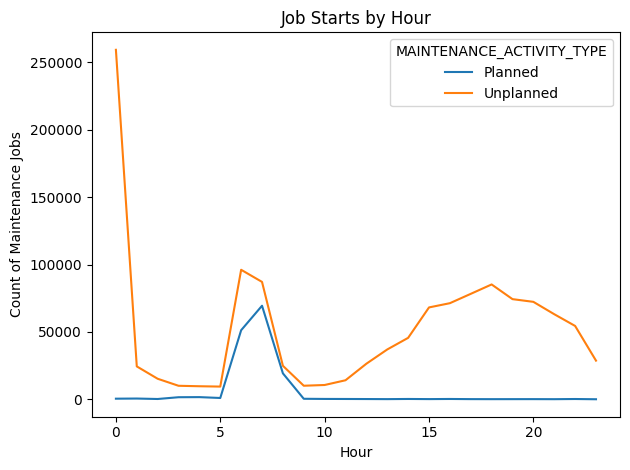

In [ ]:
df['hour_start'] = df['ACTUAL_START_TIME'].dt.hour
count_by_hour_type = df.groupby(['hour_start','MAINTENANCE_ACTIVITY_TYPE']).size().unstack()

plt.figure(figsize=(10,6))
count_by_hour_type.plot(kind='line')
plt.title('Job Starts by Hour')
plt.ylabel('Count of Maintenance Jobs')
plt.xlabel('Hour')
plt.tight_layout()
plt.show()

This doesn't seem to be much help, knowing that Swire admitted that lots of jobs did not have a proper timestamp, which accounts for the spike at midnight. Planned maintenance seems to be done at a consistent time of day.

<a class="anchor" id="production_location"></a>

## Production Location

[Back to Table of Contents](#back_to_toc)

What does the overall maintenance activity look like across plants (both planned and unplanned)?

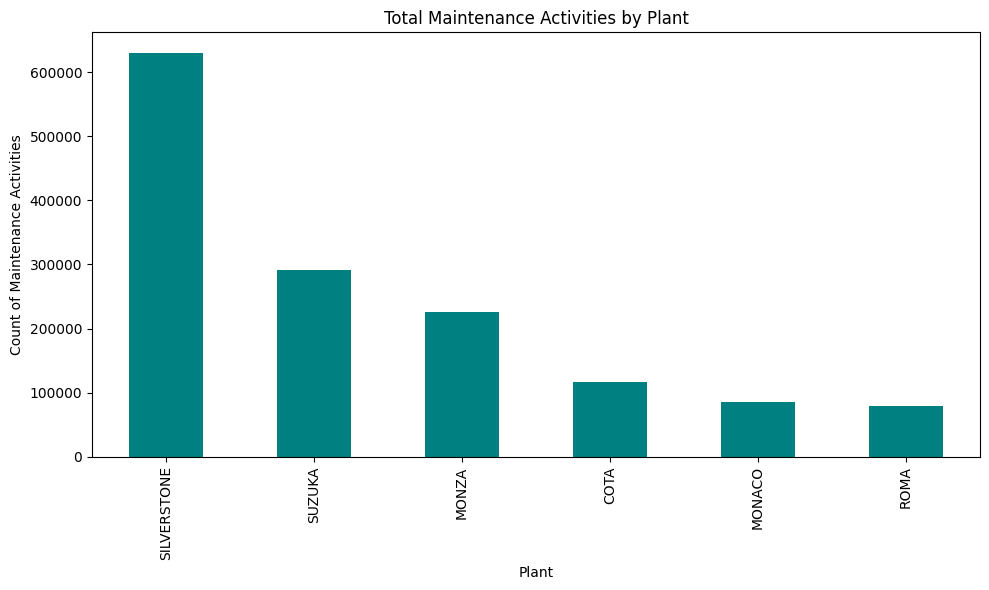

In [ ]:
# Group by plant and count the total number of maintenance activities (planned and unplanned)
maintenance_by_plant = df.groupby('PRODUCTION_LOCATION')['ORDER_ID'].count().sort_values(ascending=False)

# Plot the maintenance activities by plant (in descending order)
plt.figure(figsize=(10,6))
maintenance_by_plant.plot(kind='bar', color='teal')
plt.title("Total Maintenance Activities by Plant")
plt.xlabel("Plant")
plt.ylabel("Count of Maintenance Activities")
plt.grid(False)
plt.tight_layout()
plt.show()

Total maintenance activities are over double at Silverstone. But, since we believe Silverstone was the only production location prior to 2017, this makes sense.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


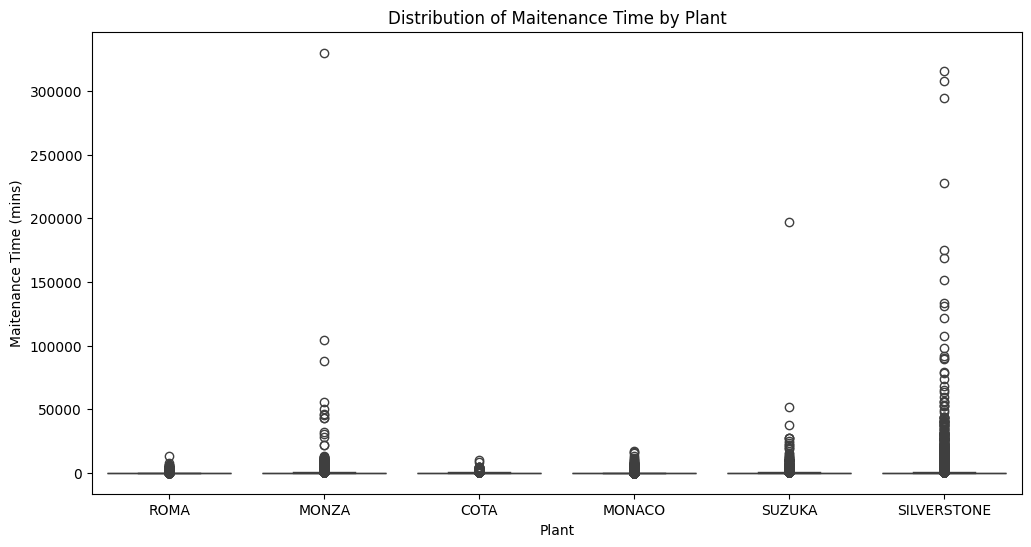

In [ ]:
# Time taken to resolve issues (by plant)
plt.figure(figsize=(12, 6))
sns.boxplot(x='PRODUCTION_LOCATION', y='ACTUAL_WORK_IN_MINUTES', data=df)
plt.title('Distribution of Maitenance Time by Plant')
plt.ylabel('Maitenance Time (mins)')
plt.xlabel('Plant')
plt.show()

Not only does Silverstone have substantially more maintenence acitivities recorded, but the time it took in minutes to perform maintenance was also longer at that plant. This could be due to the size of the plant.

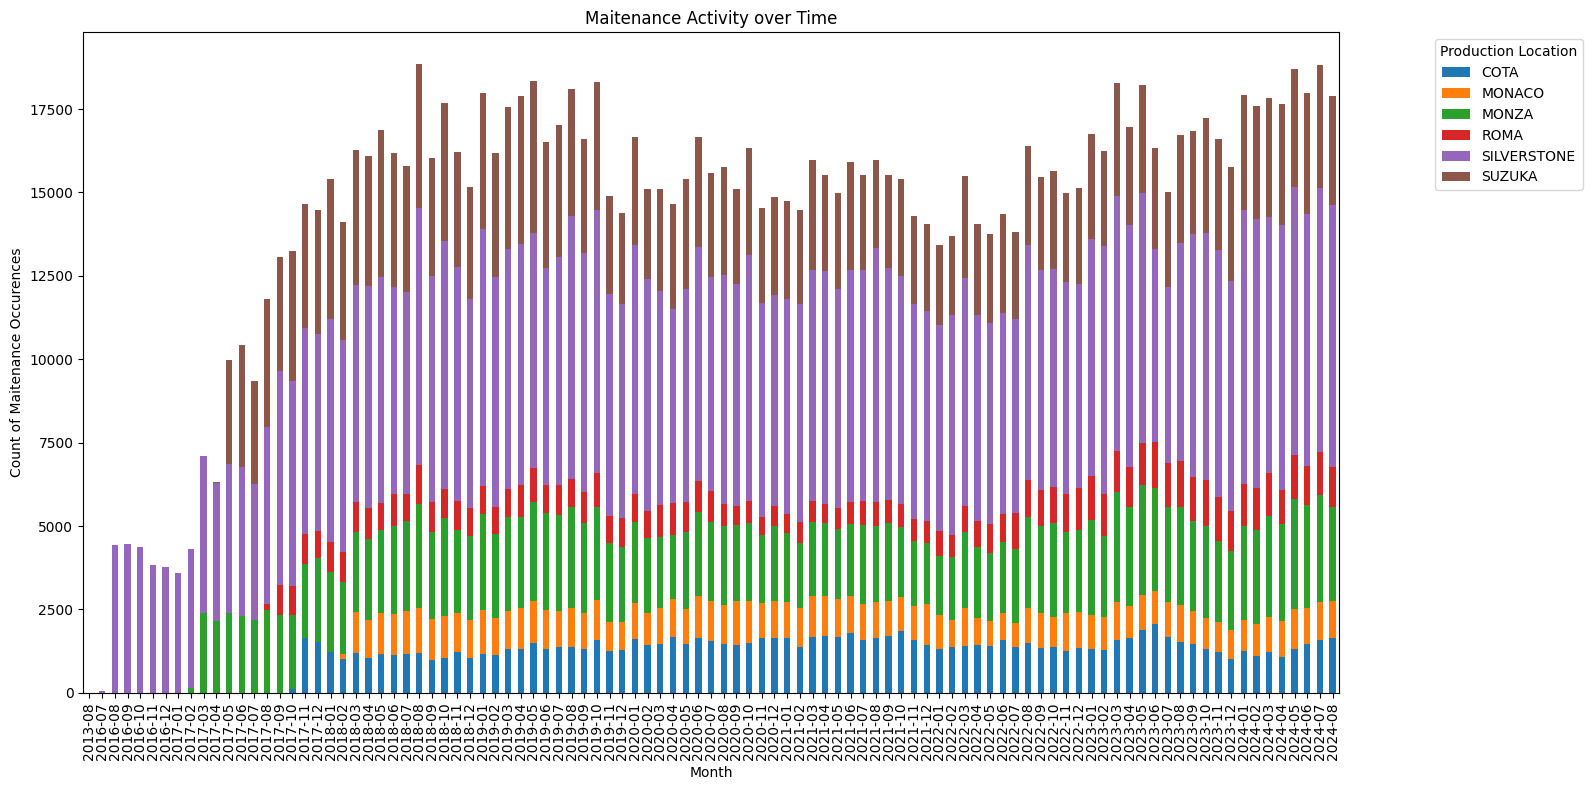

In [ ]:
# grouping maintenance jobs by plant
jobs_by_plant = df.groupby(['START_YEAR_MONTH','PRODUCTION_LOCATION']).size().unstack()

# graphing count of maintenance occurances and acivity over time, by production location
jobs_by_plant.plot(kind='bar', stacked=True, figsize=(16,8))
plt.xlabel('Month')
plt.ylabel('Count of Maitenance Occurences')
plt.title('Maitenance Activity over Time')
plt.legend(title='Production Location', loc='upper right', bbox_to_anchor=(1.2,1))
plt.tight_layout()
plt.show()

There's not a ton of variability to the naked eye, but one interesting piece is that we can see when plants first started adopting the software.

In [ ]:
# viewing first few rows of data
df.head()

,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,MAINTENANCE_ITEM,MAINTENANCE_ACTIVITY_TYPE,ORDER_DESCRIPTION,MAINTENANCE_TYPE_DESCRIPTION,FUNCTIONAL_LOC,FUNCTIONAL_AREA_NODE_1_MODIFIED,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO,START_YEAR_MONTH,YEAR,EQUIP_START_UP_YEAR_MONTH,MONTH,Planned,hour_start
0,705642457,G812,ROMA,2024-05-04,2024-05-12,1900-01-01 06:00:00,1900-01-01 23:04:08,390.0,NaN,NaN,Unplanned,L2 GEARBOX LEAK (SEE ATTACHED),Corrective Maintenance Order,G812-PRD-L15-L03-L030-020,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31,2024-05,2024,2020-04,2024-05-01,False,6
1,704191697,G812,ROMA,2022-09-13,2022-09-13,1900-01-01 06:00:00,1900-01-01 17:17:24,420.0,NaN,NaN,Unplanned,LINE 3 CONVEYOR AT CAN CODER,Corrective Maintenance Order,G812-PRD-L15-L03-L030-020,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31,2022-09,2022,2020-04,2022-09-01,False,6
2,704466547,G812,ROMA,2022-12-21,2022-12-21,1900-01-01 07:00:00,1900-01-01 07:00:00,30.0,NaN,NaN,Unplanned,BROKEN CONVEYOR RAIL,Corrective Maintenance Order,G812-PRD-L15-L03-L030-020,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31,2022-12,2022,2020-04,2022-12-01,False,7
3,703834477,G812,ROMA,2022-07-04,2022-07-04,1900-01-01 06:00:00,1900-01-01 06:00:00,60.0,NaN,NaN,Unplanned,LINE 3 CONVEYOR,Corrective Maintenance Order,G812-PRD-L15-L03-L030-020,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31,2022-07,2022,2020-04,2022-07-01,False,6
4,704661125,G291,MONZA,2023-03-15,2023-03-15,1900-01-01 07:00:00,1900-01-01 07:00:00,120.0,NaN,NaN,Unplanned,REPLACED SONIC AIR BLOWER BELT,Corrective Maintenance Order,G291-PRD-P05,MONZA PRODUCTION,AIR SYSTEMS,NaN,NaN,NaN,300001088.0,TANK_STL_STOR_AIR,Machines,2017-02-15,2023-12-11,9999-12-31,2023-03,2023,2017-02,2023-03-01,False,7


<a class="anchor" id="start_ups"></a>

## Start Ups
I.e. When a piece of new equipment was installed

[Back to Table of Contents](#back_to_toc)

In [ ]:
warnings.filterwarnings('ignore')

# Copy the dataframe and extract year and month from 'EXECUTION_START_DATE' into new columns
startup = df.copy()
startup['START_YEAR_MONTH'] = pd.to_datetime(startup['EXECUTION_START_DATE']).dt.strftime('%Y-%m')
startup['YEAR'] = pd.to_datetime(startup['EXECUTION_START_DATE']).dt.year

# Drop the 'YEAR' column after extracting the date information
startup.drop(columns=['YEAR'], inplace=True)

startup['EQUIP_START_UP_DATE'] = pd.to_datetime(startup['EQUIP_START_UP_DATE'], errors='coerce')

# Filter equipment with start-up dates after January 2018
startup = startup[startup['EQUIP_START_UP_DATE'] >= '2018-01-01']

# Create year and month features from the start-up date
startup['Start_year'] = startup['EQUIP_START_UP_DATE'].dt.year
startup['Start_year'] = startup['Start_year'].astype(str)
startup['Start_month'] = startup['EQUIP_START_UP_DATE'].dt.month
startup['Start_month'] = startup['Start_month'].astype(str)

# Combine the year and month into a new 'YYMM_starts' column
startup['YYMM_starts'] = startup['Start_year'] + " " + startup['Start_month']


In [ ]:
# Sort and view the last 20 outputs of startups per year and per year-month
startups_per_year = startup['YYMM_starts'].value_counts()
startups_Year = startup['Start_year'].value_counts()
startups_Year = startups_Year.sort_index(ascending=True)
startups_per_year = startups_per_year.sort_index(ascending=True)
startups_per_year.tail()

,count
YYMM_starts,
2023 4,394
2023 8,17
2023 9,2
2024 4,121
2024 5,2


In [ ]:
# Count the number of equipment start-ups per year-month
df_start_ups_per_month = df['EQUIP_START_UP_YEAR_MONTH'].value_counts()

df_start_ups_per_month.head()

,count
EQUIP_START_UP_YEAR_MONTH,
2017-02,53650
2019-10,5802
2020-04,4270
2017-06,3018
2019-08,1975


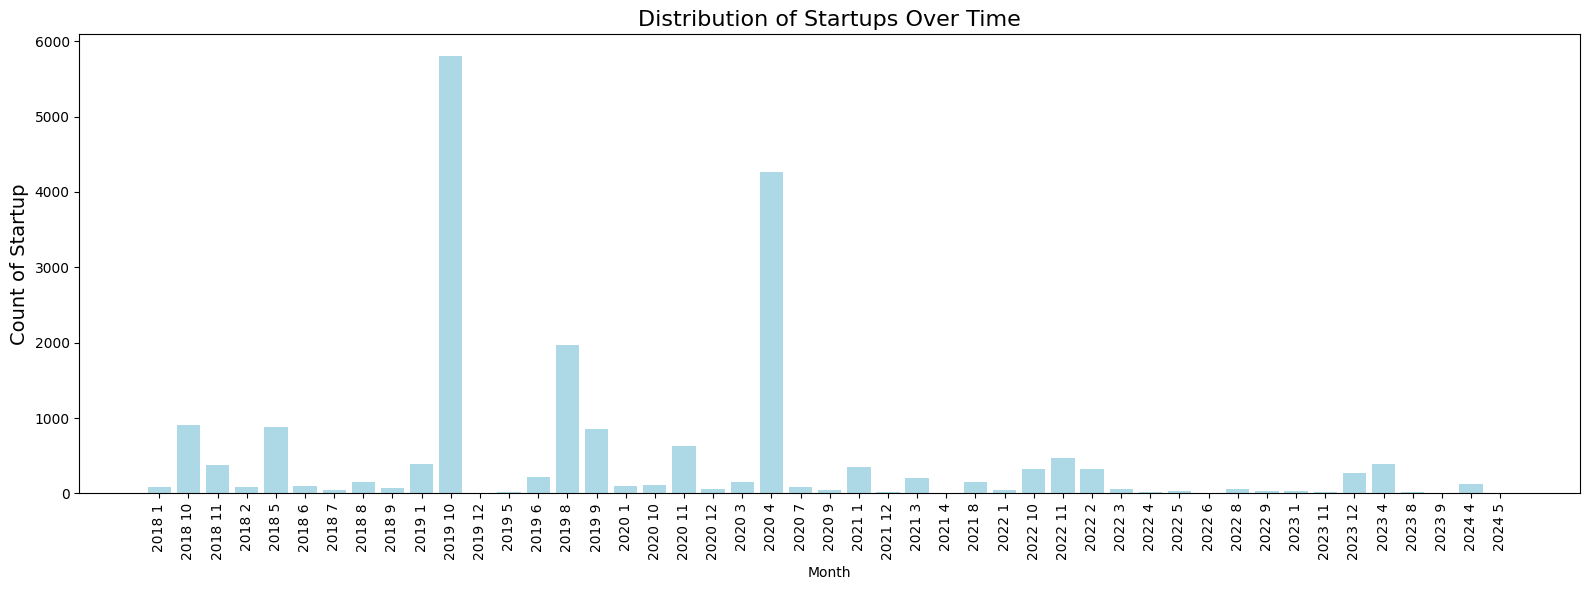

In [ ]:
# plot the distribution of startups over months and years
plt.figure(figsize=(16, 6))
plt.bar(startups_per_year.index, startups_per_year.values, width=0.8, color='lightblue')
plt.xlabel('Month')
plt.ylabel('Count of Startup', fontsize=14)
plt.title('Distribution of Startups Over Time', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Ocober 2019 and April 2020 seem to have significantly higher counts of disbribution startups compared to other months/years.

<BarContainer object of 7 artists>

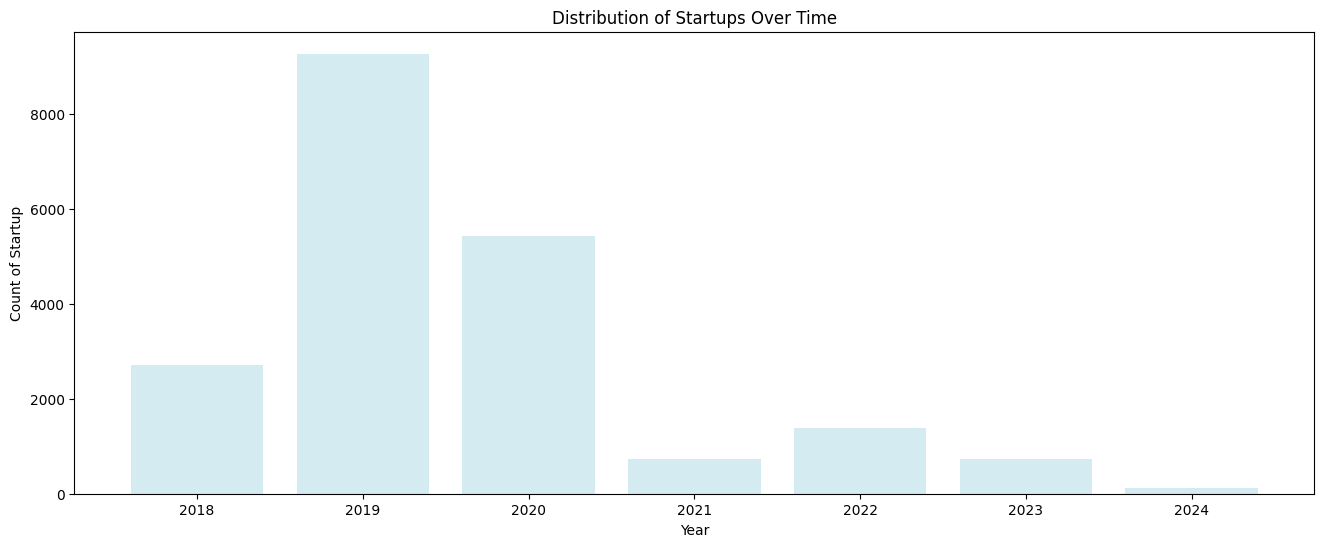

In [ ]:
# plot the count of startups per year
plt.figure(figsize=(16, 6))  # Create a single figure
plt.xlabel('Year')
plt.ylabel('Count of Startup')
plt.title('Distribution of Startups Over Time')
plt.bar(startups_Year.index, startups_Year.values, width=0.8, color='lightblue', alpha=0.5, label='Startups Count')

2019 (followed by 2020) seem to have the highest count of startups compared to other years.

<a class="anchor" id="breakdowns"></a>

## Breakdowns

[Back to Table of Contents](#back_to_toc)

Distribution of top breakdowns over time
- Identify trends for potential time series modeling
- Potentially correlate breakdowns with replacements to understand relationships

In [ ]:
# group data by functional_area_node_2_modified and maintenance_activity_type
grouped_data = df.groupby('FUNCTIONAL_AREA_NODE_2_MODIFIED')['MAINTENANCE_ACTIVITY_TYPE'].count()
grouped_data = grouped_data.reset_index()

# Rename the count column
grouped_data = grouped_data.rename(columns={'MAINTENANCE_ACTIVITY_TYPE': 'Activity_Count'})

# create list where activity count is greater than 10000
df_for_list = grouped_data[grouped_data['Activity_Count']> 10000]
breakdown_list = df_for_list['FUNCTIONAL_AREA_NODE_2_MODIFIED'].tolist()

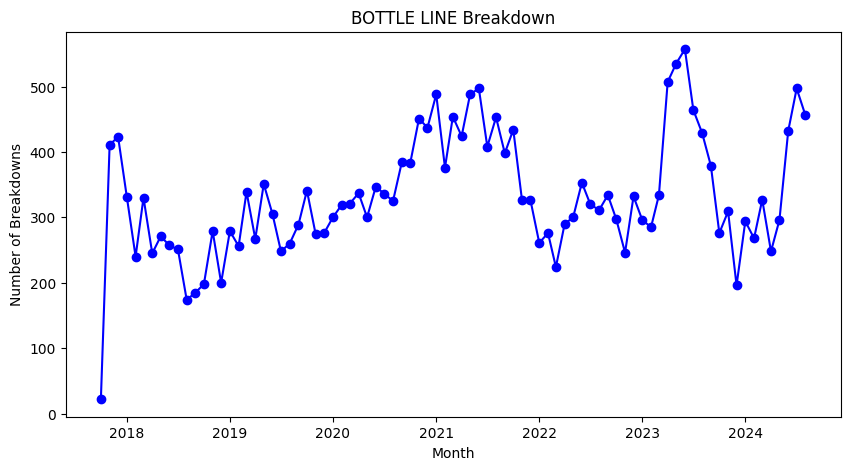

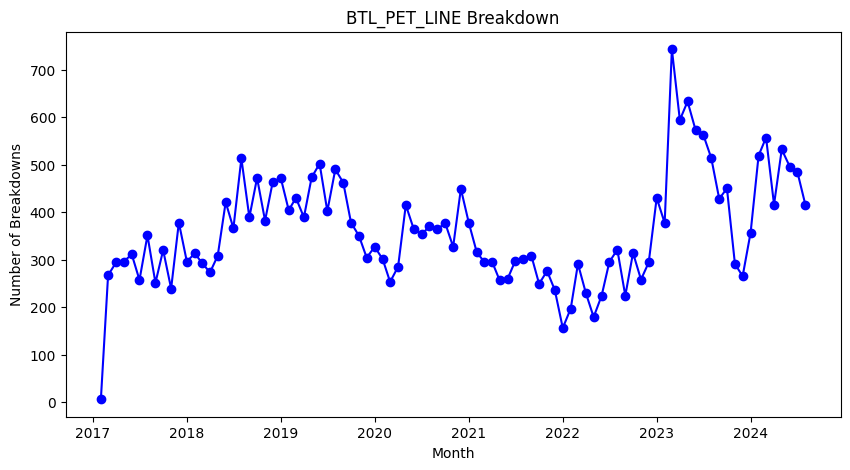

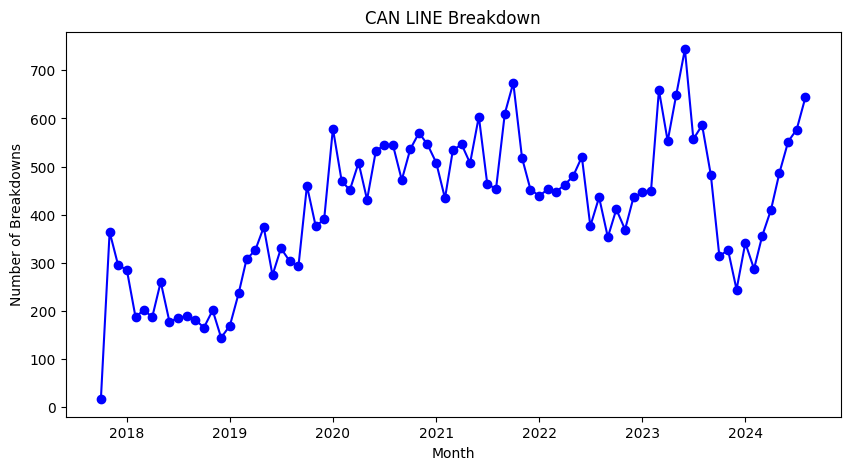

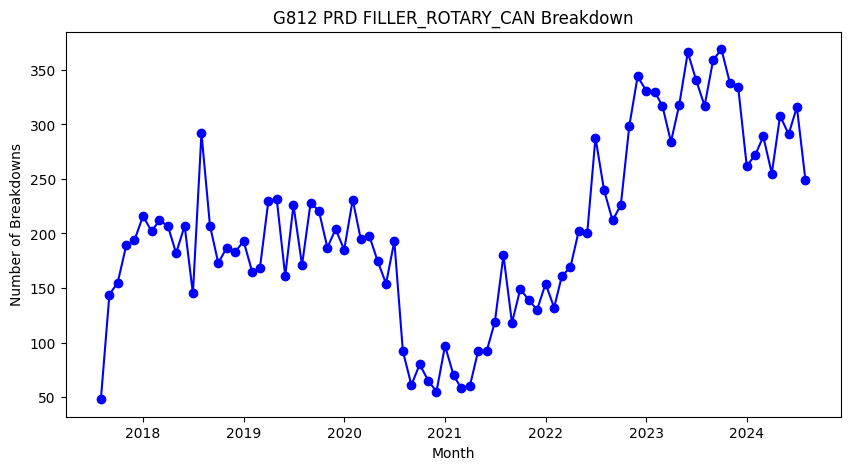

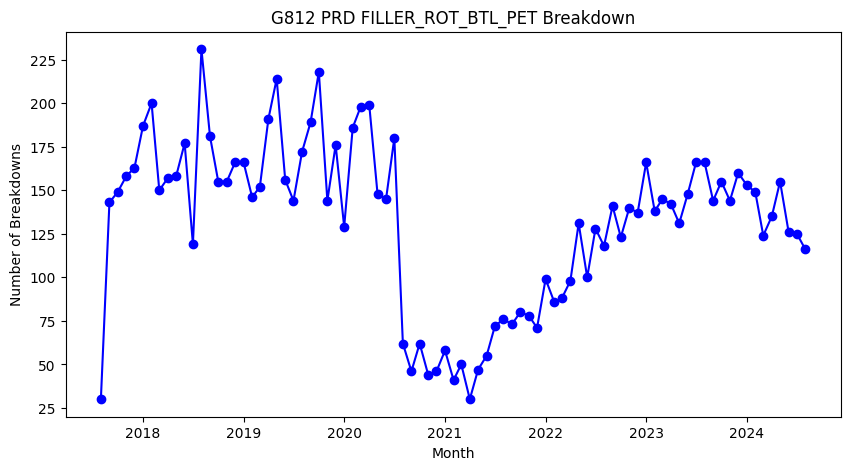

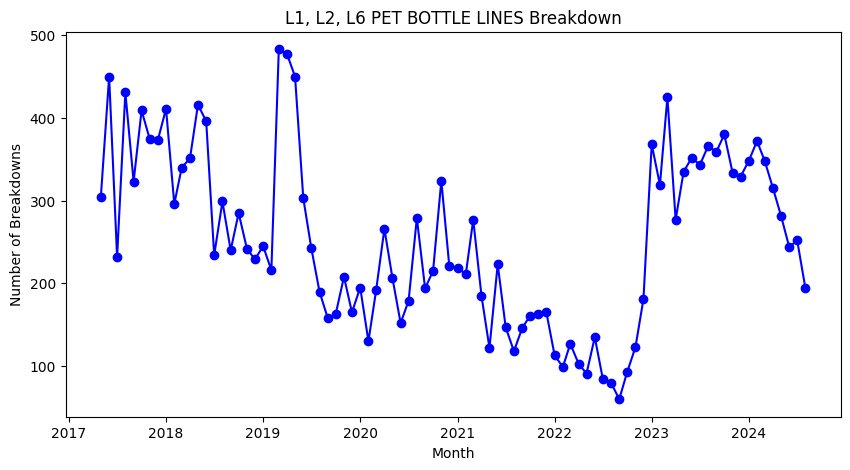

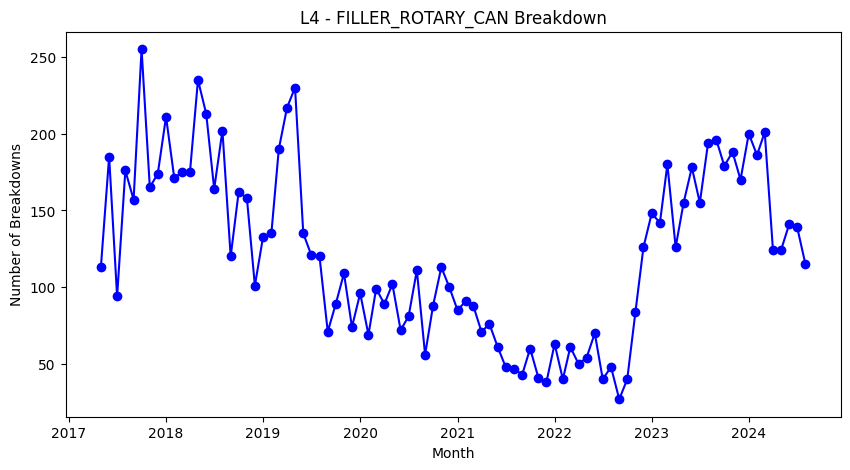

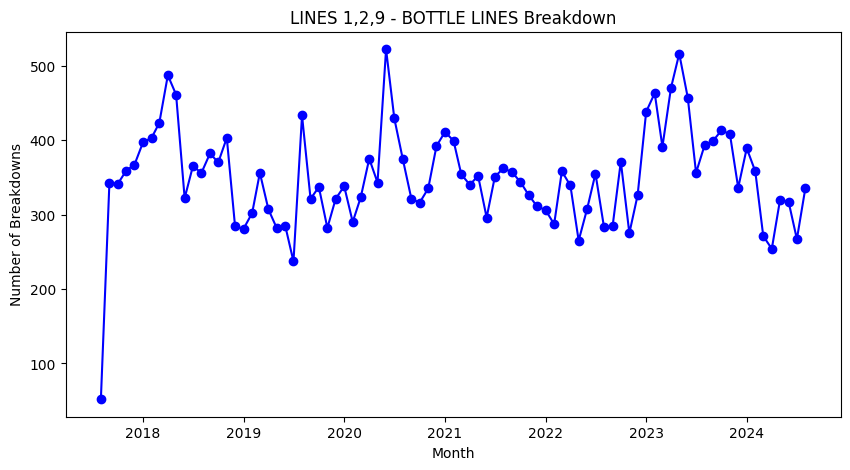

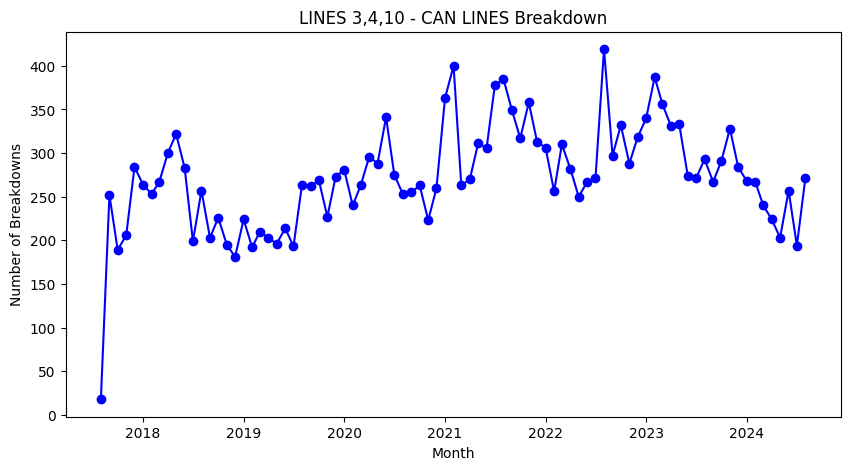

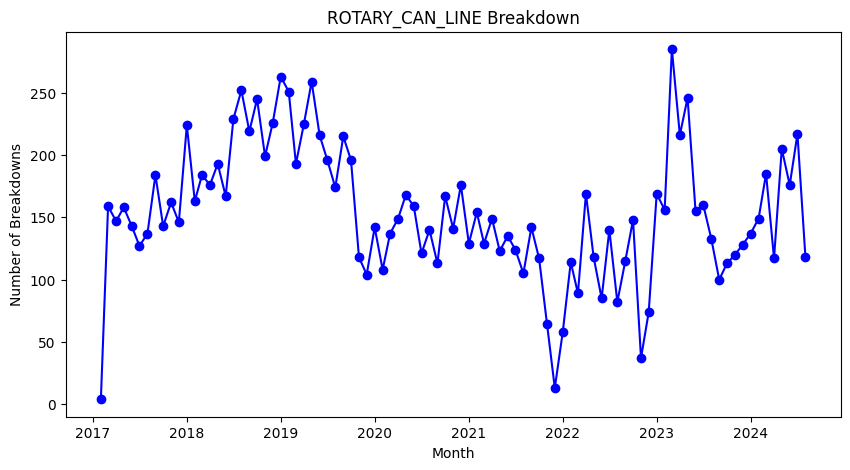

In [ ]:
# plot breakdowns over the years (for functional_area_node_2_modified)
for item in breakdown_list:
    plot_df = df[df['FUNCTIONAL_AREA_NODE_2_MODIFIED'] == item].groupby('MONTH').count()
    plot_df = plot_df.reset_index()
    plt.figure(figsize=(10, 5))  # Set the figure size
    plt.plot(plot_df['MONTH'], plot_df['ORDER_ID'], marker='o', linestyle='-', color='b')  # Line plot with markers
    plt.title(f'{item} Breakdown')
    plt.xlabel('Month')
    plt.ylabel('Number of Breakdowns')
    plt.show()

This was interesting to get a visual representation of the breakdown trends for this column of data in our dataset. One interesting thing to uncover in the future would be to overlay the start ups (new equipment) with breakdowns.

<a class="anchor" id="equipment_description"></a>

## Equipment Description

[Back to Table of Contents](#back_to_toc)

Distribution of top replacements over time
- Identify trends for potential time series modeling

In [ ]:
grouped_data = df.groupby(['PRODUCTION_LOCATION','EQUIPMENT_DESC'])['MAINTENANCE_ACTIVITY_TYPE'].count()
# Reset the index to convert the result to a DataFrame
grouped_data = grouped_data.reset_index()

# Rename the count column
grouped_data = grouped_data.rename(columns={'MAINTENANCE_ACTIVITY_TYPE': 'Activity_Count'})

# create list
df_for_list = grouped_data[grouped_data['Activity_Count']> 1000]
equipment_list = df_for_list['EQUIPMENT_DESC'].tolist()
equipment_list

['L1 FILLER_ROTARY_CAN_72_VALVE',
 'L2 LABELER_BOTTLE_TRINE 4600_#1',
 'L3 PACKR_CASE_WESTROCK_DD1250M',
 'L1 CAPPER_RTRY',
 'L1 FILLER_ROTARY_BTL_60_VALVE',
 'L2 CAPPER_RTRY_9HD',
 'L2 FILLER_ROTARY_BTL_45_VALVE',
 'L2 PALLETIZER_LINE 2_PAI',
 'L3 FILLER_ROTARY_BTL_100_VALVE',
 'L3 LABELER_ROTARY',
 'L3 PACKER KHS TSP80V',
 'L4 FILLER_ROTARY_CAN_100_VALVE',
 'L4 PACKER_CASE',
 'L4 SEAMER_ROTARY',
 'LINE 1 LABELER_ROTARY']

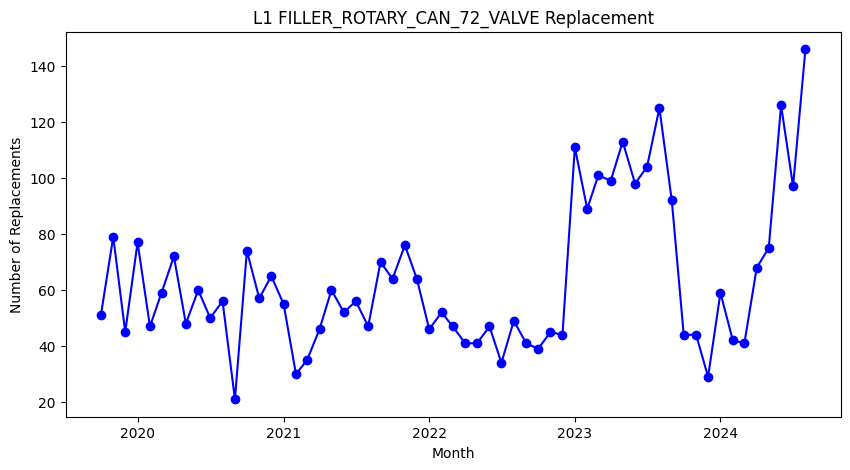

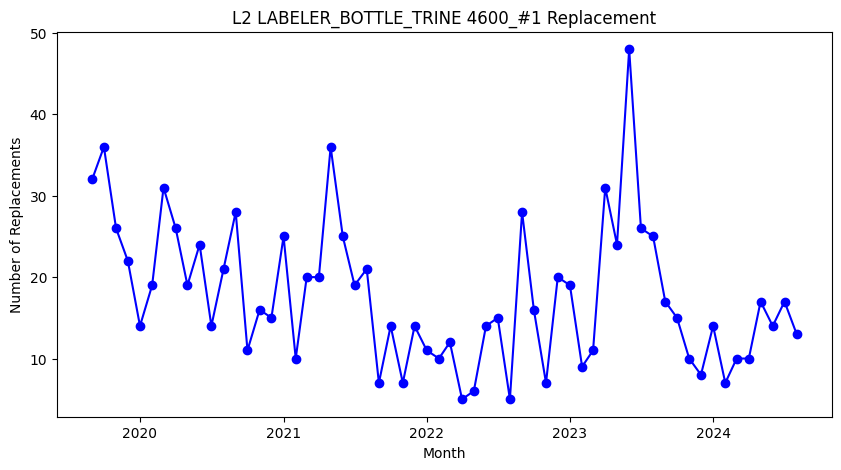

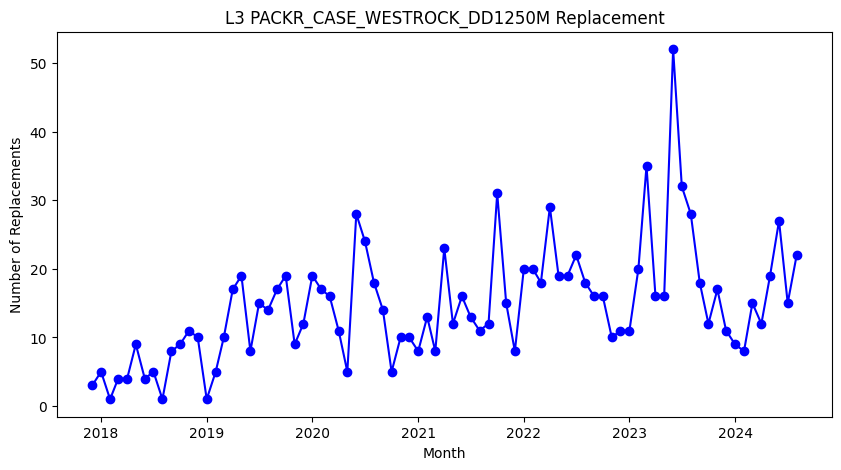

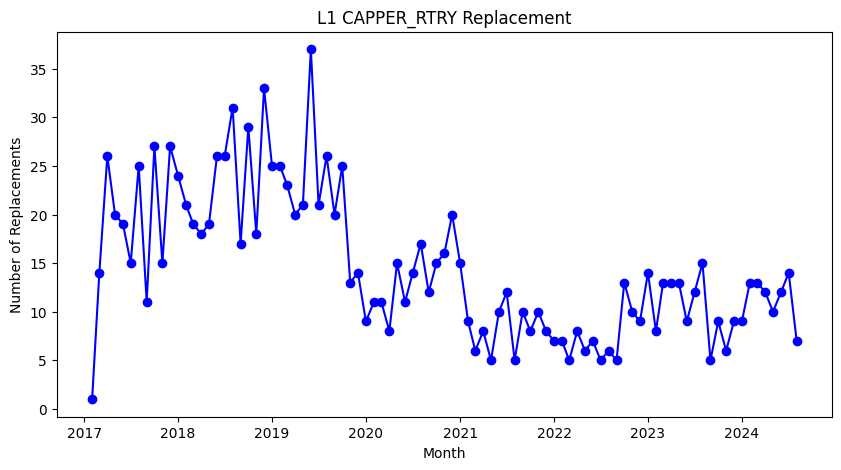

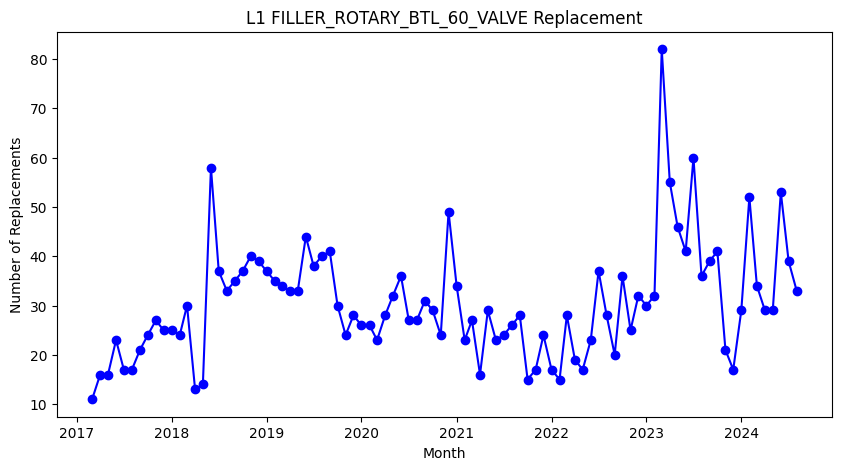

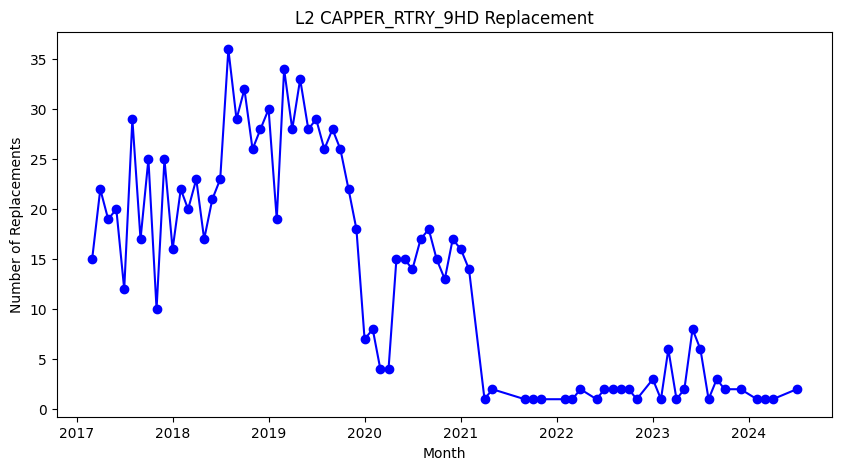

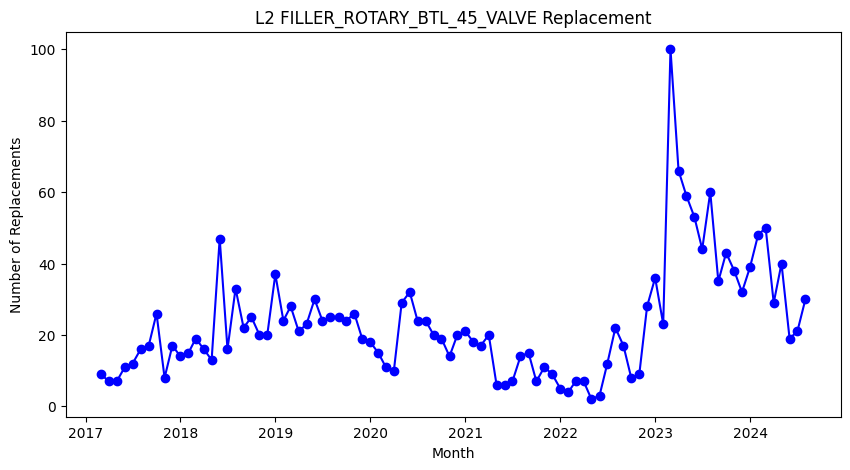

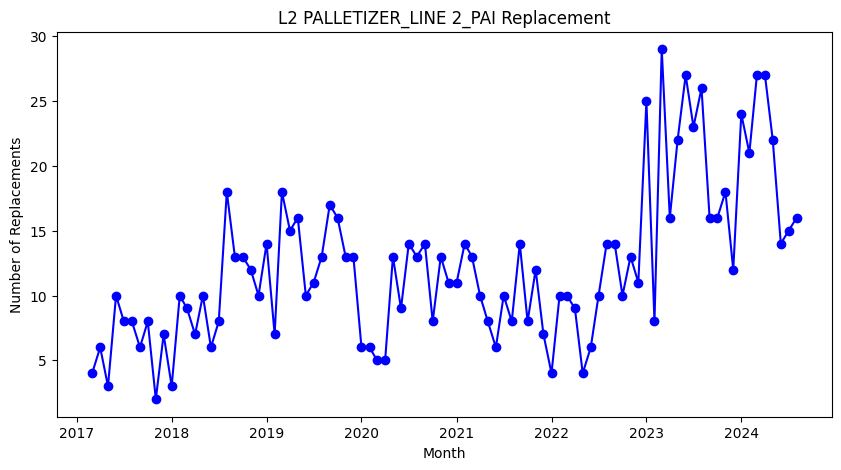

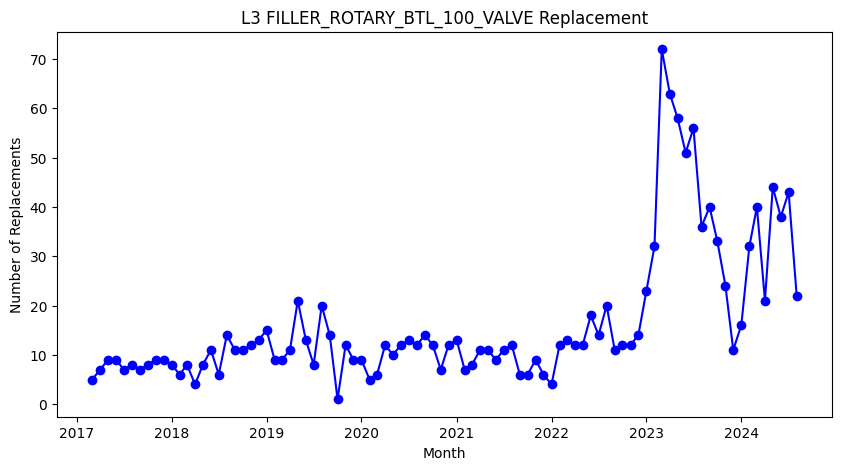

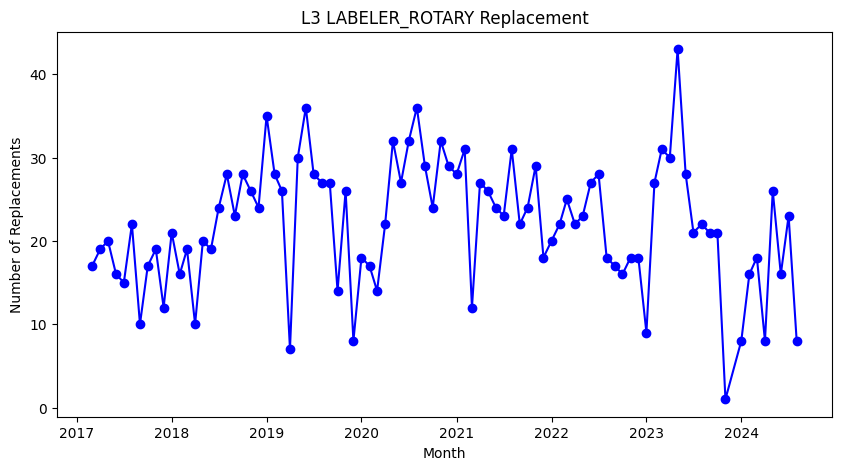

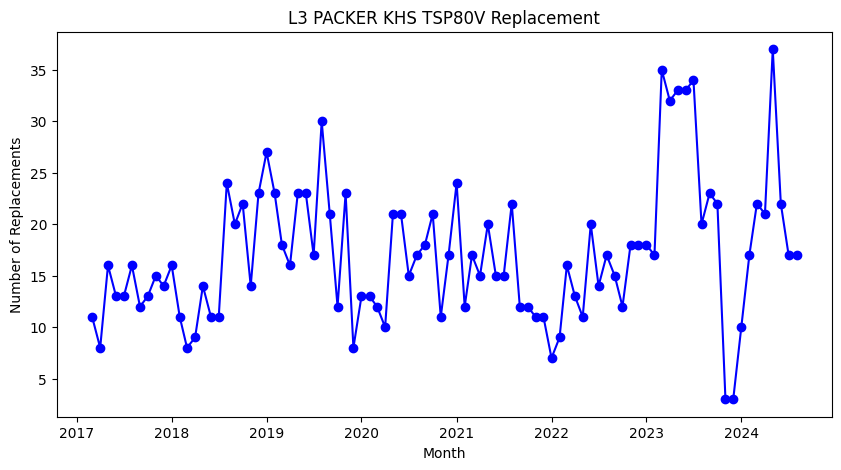

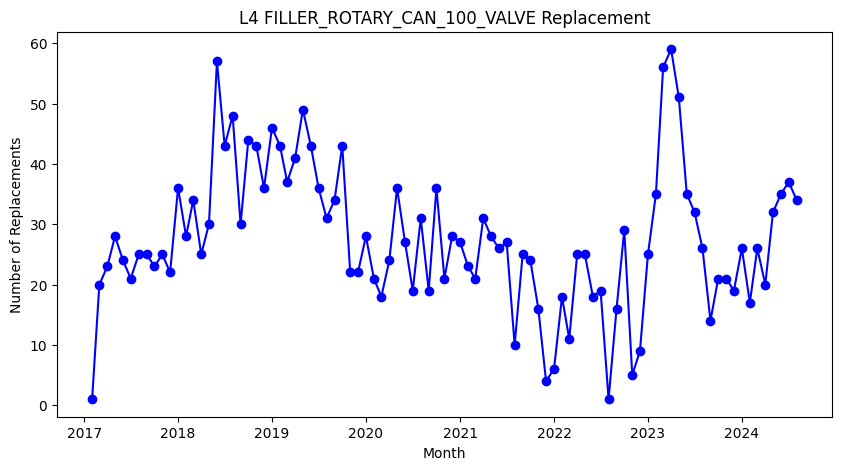

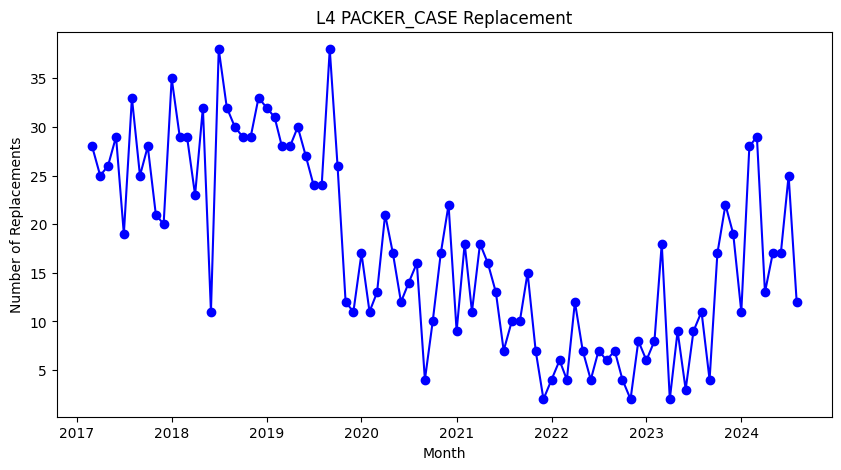

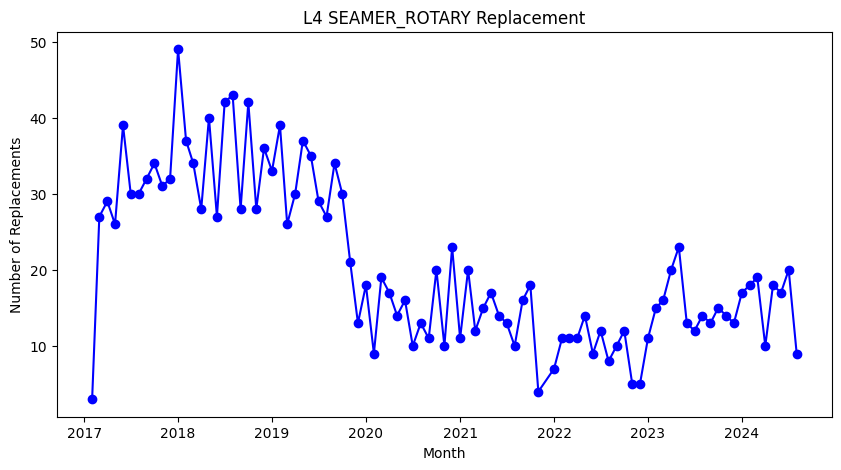

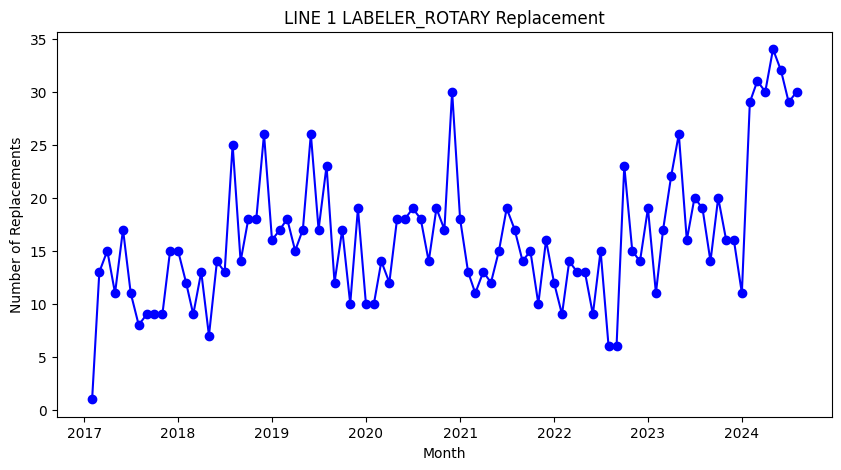

In [ ]:
# plot the number of replacements over time by equipment_desc
for item in equipment_list:
    plot_df = df[df['EQUIPMENT_DESC'] == item].groupby('MONTH').count()
    plot_df = plot_df.reset_index()
    plt.figure(figsize=(10, 5))  # Set the figure size
    plt.plot(plot_df['MONTH'], plot_df['ORDER_ID'], marker='o', linestyle='-', color='b')  # Line plot with markers
    plt.title(f'{item} Replacement')
    plt.xlabel('Month')
    plt.ylabel('Number of Replacements')
    plt.show()

<a class="anchor" id="real_life_cycle"></a>

## Real Life Cycle - Proof in Concept

[Back to Table of Contents](#back_to_toc)

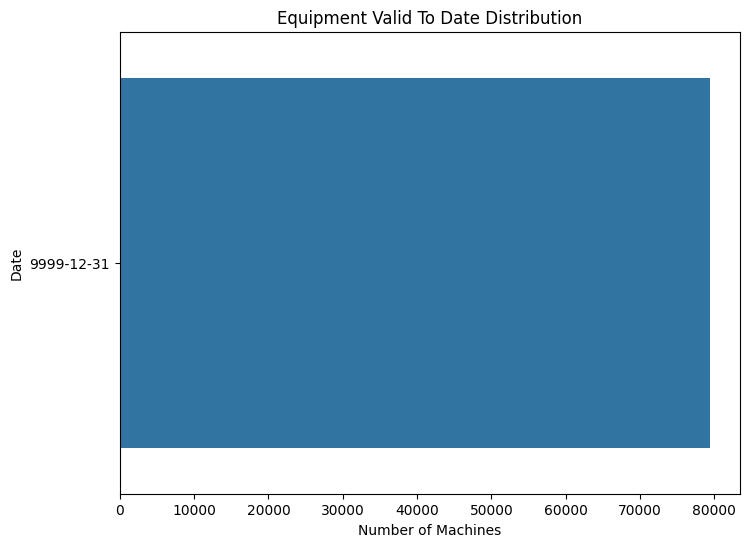

In [ ]:
# plot the equip_valid_to column by count
plt.figure(figsize=(8, 6))
sns.countplot(y=df['EQUIP_VALID_TO'], order=df['EQUIP_VALID_TO'].value_counts().index)
plt.title(f"Equipment Valid To Date Distribution")
plt.ylabel('Date')
plt.xlabel('Number of Machines')
plt.show()

It's obvious in the data that the "equipment valid to" isn't really realistic, so we will attempt to create a certain lifespan to each piece of equipment.

The first step is to boil the dataset down to columns that are needed.

In [ ]:
# create new dataframe
selected_columns = ['PRODUCTION_LOCATION', 'EQUIPMENT_ID', 'EXECUTION_START_DATE', 'EXECUTION_FINISH_DATE', 'ACTUAL_WORK_IN_MINUTES']

sm_df = df[selected_columns].sort_values(selected_columns)

Now, we want to filter out anything that has a count of 1 since these items don't offer much to learn from.

In [ ]:
# filter out anything with a count of 1
sm_df_filtered = sm_df.groupby('EQUIPMENT_ID').filter(lambda x: len(x) > 1)[selected_columns]

<a class="anchor" id="aggregate"></a>

### Aggregate

Now we can find how many times a product was maintained by day, and how much time it took.

In [ ]:
# aggregate counts and total minutes of actual work
sm_df_filtered_agg = sm_df_filtered.groupby(['PRODUCTION_LOCATION','EQUIPMENT_ID', 'EXECUTION_START_DATE', 'EXECUTION_FINISH_DATE',]).agg(
    counts=('EQUIPMENT_ID', 'size'),
    total_mins=('ACTUAL_WORK_IN_MINUTES', 'sum')
).reset_index()

# view head of data
sm_df_filtered_agg.head()

,PRODUCTION_LOCATION,EQUIPMENT_ID,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,counts,total_mins
0,COTA,300025746.0,2017-12-12,2017-12-12,1,6.0
1,COTA,300025746.0,2018-05-23,2018-05-23,1,6.0
2,COTA,300025746.0,2019-10-22,2019-10-22,1,30.0
3,COTA,300025746.0,2021-08-26,2021-08-26,1,6.0
4,COTA,300025746.0,2023-12-08,2023-12-08,1,19.2


<a class="anchor" id="find_last_execution"></a>

This is a cleaner version of the data to analyze what we do have available in terms of equipment_id (essentially the non-null values for that column).

### Find Last Execution

We want to find the last maintenance date so we can find the average between these times.

In [ ]:
# Group by PLANT_ID and EQUIPMENT_ID
sm_df_filtered_agg['PREV_EXECUTION_FINISH_DATE'] = sm_df_filtered_agg.groupby(['PRODUCTION_LOCATION', 'EQUIPMENT_ID'])['EXECUTION_FINISH_DATE'].shift(1)

# view head of data
sm_df_filtered_agg.head()

,PRODUCTION_LOCATION,EQUIPMENT_ID,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,counts,total_mins,PREV_EXECUTION_FINISH_DATE
0,COTA,300025746.0,2017-12-12,2017-12-12,1,6.0,NaT
1,COTA,300025746.0,2018-05-23,2018-05-23,1,6.0,2017-12-12
2,COTA,300025746.0,2019-10-22,2019-10-22,1,30.0,2018-05-23
3,COTA,300025746.0,2021-08-26,2021-08-26,1,6.0,2019-10-22
4,COTA,300025746.0,2023-12-08,2023-12-08,1,19.2,2021-08-26


<a class="anchor" id="find_lifespan"></a>

### Find Lifespan

LIFE represents the time between the maintenance by location and equipment_id.

In [ ]:
sm_df_filtered_agg['PREV_EXECUTION_FINISH_DATE'] = sm_df_filtered_agg['PREV_EXECUTION_FINISH_DATE'].fillna(sm_df_filtered_agg['EXECUTION_START_DATE'])

# Calculate the time difference (life) in days between consecutive EXECUTION_START_DATE and the previous EXECUTION_FINISH_DATE
sm_df_filtered_agg['LIFE'] = (sm_df_filtered_agg['EXECUTION_START_DATE'] - sm_df_filtered_agg['PREV_EXECUTION_FINISH_DATE']).dt.days

# Replace NaN with 0 for the first occurrence
sm_df_filtered_agg['LIFE'] = sm_df_filtered_agg['LIFE'].fillna(pd.NA)

sm_df_filtered_agg.head()

,PRODUCTION_LOCATION,EQUIPMENT_ID,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,counts,total_mins,PREV_EXECUTION_FINISH_DATE,LIFE
0,COTA,300025746.0,2017-12-12,2017-12-12,1,6.0,2017-12-12,0
1,COTA,300025746.0,2018-05-23,2018-05-23,1,6.0,2017-12-12,162
2,COTA,300025746.0,2019-10-22,2019-10-22,1,30.0,2018-05-23,517
3,COTA,300025746.0,2021-08-26,2021-08-26,1,6.0,2019-10-22,674
4,COTA,300025746.0,2023-12-08,2023-12-08,1,19.2,2021-08-26,834


In [ ]:
# filters the above dataframe for counts > 1
sm_df_filtered_agg[sm_df_filtered_agg['counts'] > 1].head()

,PRODUCTION_LOCATION,EQUIPMENT_ID,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,counts,total_mins,PREV_EXECUTION_FINISH_DATE,LIFE
58,COTA,300025754.0,2018-02-01,2018-02-02,2,48.0,2018-01-17,15
60,COTA,300025754.0,2018-08-30,2018-08-30,2,48.0,2018-05-17,105
62,COTA,300025754.0,2018-11-20,2018-11-20,4,42.0,2018-10-06,45
63,COTA,300025754.0,2018-12-07,2018-12-07,2,48.0,2018-11-20,17
67,COTA,300025754.0,2019-02-25,2019-02-25,2,78.0,2019-02-20,5


Looks like there are times where the same equipment_id is worked on in a day, so this should be accounted for.

In [ ]:
# simpler naming
workable_df = sm_df_filtered_agg

In [ ]:
# adding weights to the life calculation as discussed above
weighted_life = workable_df.groupby(['PRODUCTION_LOCATION', 'EQUIPMENT_ID']).apply(
    lambda x: pd.Series({
        # adding a weight to the counts
        'WEIGHTED_MEAN_LIFESPAN': (x['LIFE'] * x['counts']).sum() / x['counts'].sum(),
        'MEAN_TIME_MAINTENENCE': x['total_mins'].mean()
    })
).reset_index()

# view df head
weighted_life.head()

,PRODUCTION_LOCATION,EQUIPMENT_ID,WEIGHTED_MEAN_LIFESPAN,MEAN_TIME_MAINTENENCE
0,COTA,300025746.0,437.400000,13.440
1,COTA,300025747.0,445.666667,6.000
2,COTA,300025748.0,445.666667,10.000
3,COTA,300025749.0,445.666667,6.000
4,COTA,300025750.0,128.125000,53.625


Adding weights allows for a more balanced output by giving more importance to equipment with higher maintenance counts, ensuring that the lifespan calculation reflects the actual workload/frequency of use.

In [ ]:
# print length of df
print(fr"Total Length:", {len(weighted_life)})

Total Length: {2538}


Now we want to map these values back to the other data frame.

In [ ]:
# select columns from dataframes created above
selected_columns = ['PRODUCTION_LOCATION', 'EQUIPMENT_ID', 'EXECUTION_START_DATE', 'EXECUTION_FINISH_DATE', 'ACTUAL_WORK_IN_MINUTES', 'PREV_EXECUTION_FINISH_DATE', 'LIFE', 'MEAN_LIFESPAN', 'MEAN_TIME_MAINTENENCE']

# create new dataframe from selected columns
df_filtered = sm_df_filtered[sm_df_filtered['EQUIPMENT_ID'].notna()].filter(selected_columns)
print(fr"Total Length", {len(df_filtered)})

Total Length {291377}


In [ ]:
# sort values
df_filtered.sort_values(['PRODUCTION_LOCATION', 'EQUIPMENT_ID', 'EXECUTION_START_DATE'])

# merge dataframes
df_lifespan = pd.merge(df_filtered, weighted_life, on=['PRODUCTION_LOCATION', 'EQUIPMENT_ID'], how='left')

# view df head
df_lifespan.head()

,PRODUCTION_LOCATION,EQUIPMENT_ID,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_WORK_IN_MINUTES,WEIGHTED_MEAN_LIFESPAN,MEAN_TIME_MAINTENENCE
0,COTA,300025746.0,2017-12-12,2017-12-12,6.0,437.4,13.44
1,COTA,300025746.0,2018-05-23,2018-05-23,6.0,437.4,13.44
2,COTA,300025746.0,2019-10-22,2019-10-22,30.0,437.4,13.44
3,COTA,300025746.0,2021-08-26,2021-08-26,6.0,437.4,13.44
4,COTA,300025746.0,2023-12-08,2023-12-08,19.2,437.4,13.44


In [ ]:
# print new df length
print(fr"Total Length:", {len(df_lifespan)})

Total Length: {291377}


This is the same length as our dataframe without the weighted mean lifespan, which tells me our join was good.

In [ ]:
# explore dataframe info
df_lifespan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291377 entries, 0 to 291376
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   PRODUCTION_LOCATION     291377 non-null  object        
 1   EQUIPMENT_ID            291377 non-null  float64       
 2   EXECUTION_START_DATE    291377 non-null  datetime64[ns]
 3   EXECUTION_FINISH_DATE   291377 non-null  datetime64[ns]
 4   ACTUAL_WORK_IN_MINUTES  291377 non-null  float64       
 5   WEIGHTED_MEAN_LIFESPAN  291377 non-null  float64       
 6   MEAN_TIME_MAINTENENCE   291377 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(1)
memory usage: 15.6+ MB


Now find difference between actual work periods and what was calculated.

In [ ]:
# Convert EXECUTION_FINISH_DATE to datetime
df_lifespan['EXECUTION_FINISH_DATE'] = pd.to_datetime(df_lifespan['EXECUTION_FINISH_DATE'], errors='coerce')

# Add WEIGHTED_MEAN_LIFESPAN as a timedelta to EXECUTION_FINISH_DATE
df_lifespan['EXPECTED_MAINTENANCE_DATE'] = df_lifespan['EXECUTION_FINISH_DATE'] + pd.to_timedelta(df_lifespan['WEIGHTED_MEAN_LIFESPAN'], unit='D')

# Extract only the date part (yyyy-mm-dd) from EXPECTED_MAINTENANCE_DATE
df_lifespan['EXPECTED_MAINTENANCE_DATE'] = df_lifespan['EXPECTED_MAINTENANCE_DATE'].dt.date

# Find the date of the next actual maintenance (shifting EXECUTION_START_DATE)
df_lifespan['ACTUAL_NEXT_MAINTENACE'] = df_lifespan.groupby(['PRODUCTION_LOCATION', 'EQUIPMENT_ID'])['EXECUTION_START_DATE'].shift(-1)

# Ensure ACTUAL_NEXT_MAINTENACE is in datetime format
df_lifespan['ACTUAL_NEXT_MAINTENACE'] = pd.to_datetime(df_lifespan['ACTUAL_NEXT_MAINTENACE'], errors='coerce')

# Calculate the difference between EXPECTED_MAINTENANCE_DATE and ACTUAL_NEXT_MAINTENACE in days
df_lifespan['EXPECTED_DIFFERENCE'] = (pd.to_datetime(df_lifespan['EXPECTED_MAINTENANCE_DATE']) - df_lifespan['ACTUAL_NEXT_MAINTENACE']).dt.days

In [ ]:
# Display the first few rows
df_lifespan.sort_values(['PRODUCTION_LOCATION', 'EQUIPMENT_ID', 'EXECUTION_START_DATE']).head(20)

,PRODUCTION_LOCATION,EQUIPMENT_ID,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_WORK_IN_MINUTES,WEIGHTED_MEAN_LIFESPAN,MEAN_TIME_MAINTENENCE,EXPECTED_MAINTENANCE_DATE,ACTUAL_NEXT_MAINTENACE,EXPECTED_DIFFERENCE
0,COTA,300025746.0,2017-12-12,2017-12-12,6.0,437.400000,13.440,2019-02-22,2018-05-23,275.0
1,COTA,300025746.0,2018-05-23,2018-05-23,6.0,437.400000,13.440,2019-08-03,2019-10-22,-80.0
2,COTA,300025746.0,2019-10-22,2019-10-22,30.0,437.400000,13.440,2021-01-01,2021-08-26,-237.0
3,COTA,300025746.0,2021-08-26,2021-08-26,6.0,437.400000,13.440,2022-11-06,2023-12-08,-397.0
4,COTA,300025746.0,2023-12-08,2023-12-08,19.2,437.400000,13.440,2025-02-17,NaT,NaN
5,COTA,300025747.0,2017-12-12,2017-12-12,6.0,445.666667,6.000,2019-03-02,2018-05-23,283.0
6,COTA,300025747.0,2018-05-23,2018-05-23,6.0,445.666667,6.000,2019-08-11,2021-08-10,-730.0
7,COTA,300025747.0,2021-08-10,2021-08-10,6.0,445.666667,6.000,2022-10-29,NaT,NaN
8,COTA,300025748.0,2017-12-12,2017-12-12,12.0,445.666667,10.000,2019-03-02,2018-05-23,283.0
9,COTA,300025748.0,2018-05-23,2018-05-23,12.0,445.666667,10.000,2019-08-11,2021-08-10,-730.0


In [ ]:
# calculate the mean expected difference in the joined dataframe above
float(df_lifespan['EXPECTED_DIFFERENCE'].mean())

-0.3517772876931439

On average, maintenance is happening slightly earlier than the expected date by about 0.35 days (or around 8 hours earlier).

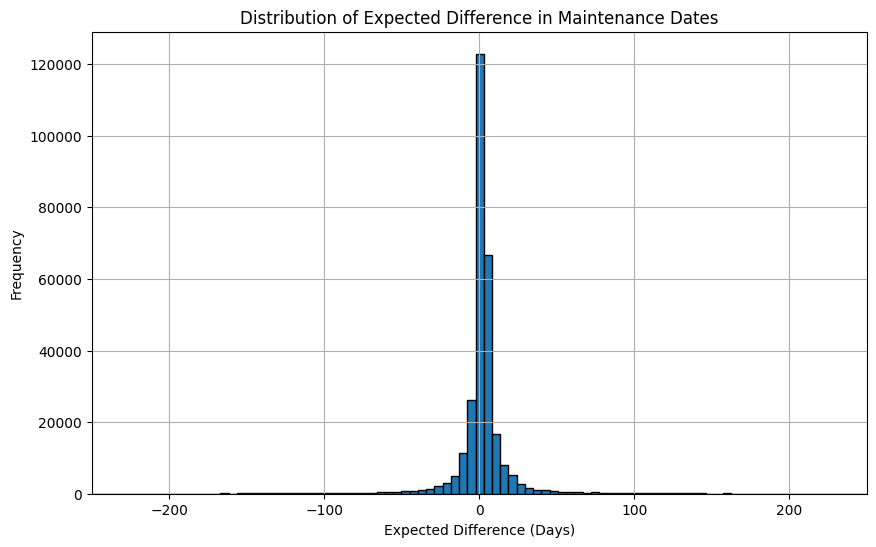

In [ ]:
# Plot a histogram of EXPECTED_DIFFERENCE
plt.figure(figsize=(10, 6))
plt.hist(df_lifespan['EXPECTED_DIFFERENCE'].dropna(), bins=500, edgecolor='black')
plt.title('Distribution of Expected Difference in Maintenance Dates')
plt.xlabel('Expected Difference (Days)')
plt.ylabel('Frequency')
plt.xlim(-250, 250)
plt.grid(True)
plt.show()

In [ ]:
# print min and max of expected difference column
print(df_lifespan['EXPECTED_DIFFERENCE'].max())
print(df_lifespan['EXPECTED_DIFFERENCE'].min())

704.0
-1952.0


<a class="anchor" id="final_thoughts"></a>

## Final Thoughts

[Back to Table of Contents](#back_to_toc)

Throughout this EDA we discovered the important variables and how they move over time. The assignment calls for us discovering how to reduce maitenance time and costs by understanding breakdown schedules as well as being able to predict parts replacement to ensure we have the correct parts available in parts storage ahead of breakdown. The most important variables for identifying these trends are EQUIP_DESC (i.e. replacement parts) and FUNCTION_AREA_2 (i.e. breakdowns). If we can identify trends within theses variables over time, then we can potentially predict when there is anomolous behavior, or an unusual amount of breakdowns for certain parts in certain plants and replace those parts pre-emplitvely before they cause an entire line failure or a multi-day replacement procedure.

Beyond simply understanding breakdown/replacement trends if we understood the breakdown trends in combination with the amount of time it took to replace, we could get a more accurate understanding of the breakdown over time. If a part takes a minute to replace on Monday, 5 minutes on Tuesday, 30 minutes on Friday then we may want to flag this to the production line as potentially being need to be replaced as the amount of time to repair it is increasing exponentially. Identifying those trend changes, from normal breakdown/replacement to unusually high breakdown/replacement per part in each plant and being able to predict/flag when those trend changes will occur will significantly reduce downtime among machines and lead to greater overall profits across all Swire plants.

## Knitting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/MSBA_capstone_3_group_eda.ipynb" ./
!jupyter nbconvert "MSBA_capstone_3_group_eda.ipynb" --to html

[NbConvertApp] Converting notebook MSBA_capstone_3_group_eda.ipynb to html
[NbConvertApp] Writing 2734089 bytes to MSBA_capstone_3_group_eda.html
